In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import math

In [12]:
data = pd.read_csv('kc_house_data.csv')
print(data['view'].head())
data.columns

0    0
1    0
2    0
3    0
4    0
Name: view, dtype: int64


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

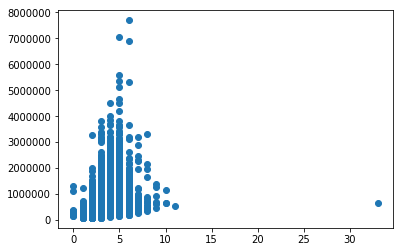

In [24]:
x = data['bedrooms']
y = data['price']
plt.scatter(x, y)
plt.show()

In [26]:
X = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','lat','long']]
Y = data['price']

In [28]:
# do not need validation data set, since linear regression has Analytical solution, no parameter tuning
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=0)

In [37]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print(type(xtrain))
xtrain = np.asmatrix(xtrain)
xtest = np.asmatrix(xtest)
print(type(xtrain))

<class 'numpy.matrixlib.defmatrix.matrix'>
<class 'numpy.matrixlib.defmatrix.matrix'>


In [39]:
print(type(ytrain))
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)
print(type(ytrain))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [40]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
model.coef_
model.intercept_
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-28853.524302
1,bathrooms,32106.340534
2,sqft_living,166.630894
3,sqft_lot,0.047288
4,floors,20040.721770
5,waterfront,621066.278026
6,view,53226.882374
7,condition,25625.015854
8,grade,105295.820466
9,yr_built,-2573.695629


In [46]:
# training error
pred = model.predict(xtrain)
mse = metrics.mean_squared_error(ytrain, pred)
print(mse)

mre = (abs(pred-ytrain)/ytrain).sum()/len(ytrain)
print(mre)

38544000842.605995
0.2546117283044957


In [50]:
# prediction error
pred = model.predict(xtest)
mse = metrics.mean_squared_error(ytest,pred)
print(mse)

mre = (abs(pred-ytest)/ytest).sum()/len(ytest)
print(mre)

45341263829.46758
0.24742038920931267
